load the dataset in a notebook and preprocess it.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [1]:
!pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. fichier excel

In [10]:
data_superstore = pd.read_excel('US Superstore data.xls', index_col = 0)

2. convertir en csv

In [17]:
data_superstore.to_csv('data_superstore.csv', index=False)


3. dataframe

In [20]:
df_stores = pd.DataFrame(data_superstore)

4. exploration ( head, info, describe, missing values, )

In [21]:
df_stores.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [24]:
df_stores.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


missing values

# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())

# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)
# Remove rows with missing values
df_cleaned = df.dropna()

# Remove columns with missing values
df_cleaned = df.dropna(axis=1)

In [30]:
missing_data = df_stores.isnull()
print(missing_data)

        Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
Row ID                                                            
1          False       False      False      False        False   
2          False       False      False      False        False   
3          False       False      False      False        False   
4          False       False      False      False        False   
5          False       False      False      False        False   
...          ...         ...        ...        ...          ...   
9990       False       False      False      False        False   
9991       False       False      False      False        False   
9992       False       False      False      False        False   
9993       False       False      False      False        False   
9994       False       False      False      False        False   

        Customer Name  Segment  Country   City  State  Postal Code  Region  \
Row ID                                            

In [29]:
missing_counts = df_stores.isnull().sum()
print(missing_counts)

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Which states have the most sales? --> creating vertical bar chart : compare sales per states

regrouper sales (.groupby)- additionner (.sum)- trier(.sorted_values)
groupby()
👉 On peut écrire : df.groupby("State")["Sales"].sum().sort_values(ascending=False)

In [ ]:
sales_by_state = df_stores.groupby("State")["Sales"].sum().sort_values(ascending=False)

In [34]:
sales_by_state.head()

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

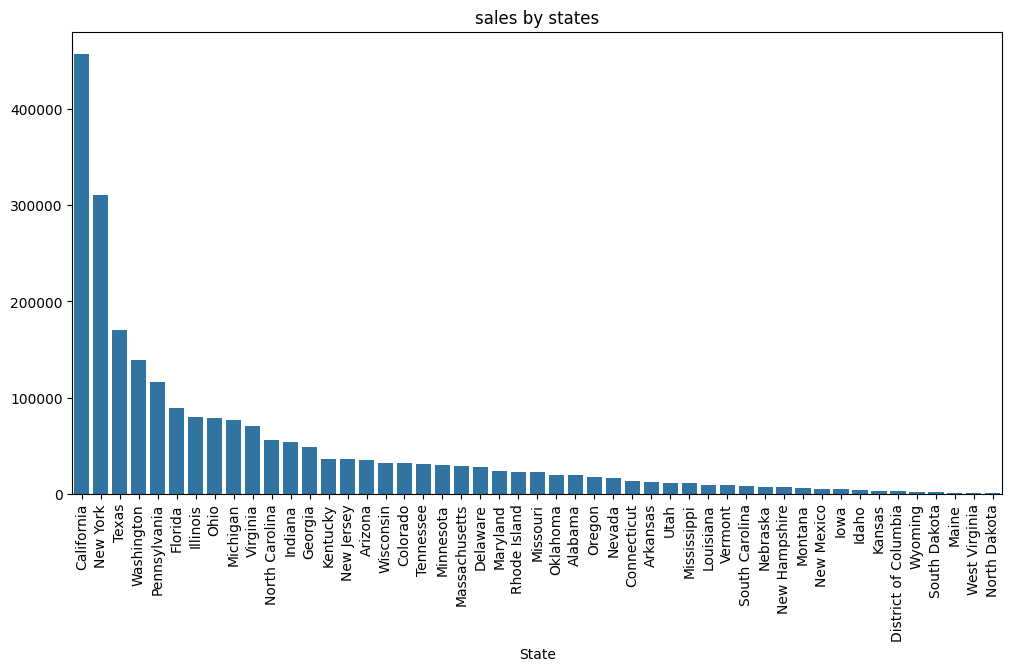

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values)
plt.xticks(rotation=90)
plt.title("sales by states")
plt.show()

What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

selection New York dans df_stores avec la condition (==)

In [48]:
df_ny = df_stores[df_stores['State'] == 'New York']

In [ ]:
df_ca = df_stores[df_stores['State'] == 'California']

# Filter data for New York and California
2ny_ca_data = df[df['State'].isin(['New York', 'California'])]
3
4# Group by state and sum sales and profit
5ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

In [67]:
ny_ca_data = df_stores[df_stores['State'].isin(['New York', 'California'])]

In [68]:
ny_ca_sum = ny_ca_data.groupby('State')[['Sales', 'Profit']]

In [70]:
ny_ca_summary.head()

,Sales,Profit
Row ID,,
3,14.620,6.8714
6,48.860,14.1694
7,7.280,1.9656
8,907.152,90.7152
9,18.504,5.7825
54,15.260,6.2566
55,1029.950,298.6855
56,208.560,52.1400
57,32.400,15.5520


In [73]:
ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

In [74]:
ny_ca_summary.head()

,State,Sales,Profit
0,California,457687.6315,76381.3871
1,New York,310876.2710,74038.5486


visualisation

C:\Users\rickia\AppData\Local\Temp\ipykernel_19072\2516449702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Sales", data=ny_ca_summary, palette="coolwarm")


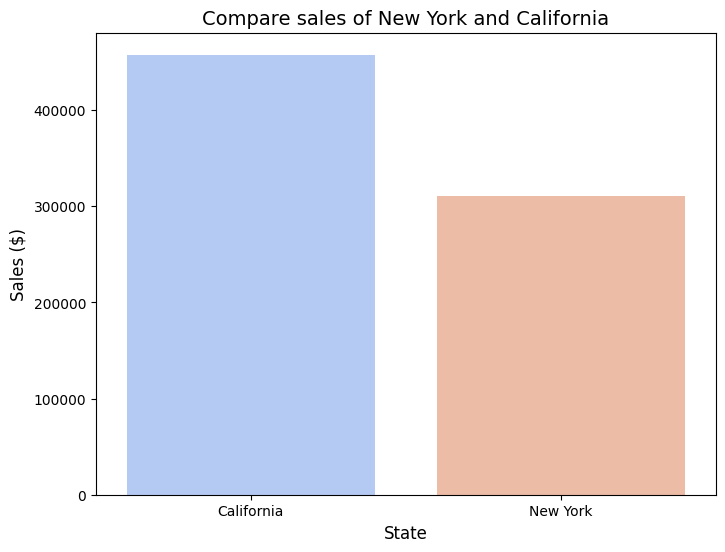

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(x="State", y="Sales", data=ny_ca_summary, palette="coolwarm")
plt.title("Compare sales of New York and California", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.show()